# Backtesting for investment strategies

# Planejamento da Solução

## Input - Entrada

### Problema de Negócio

1. Selecionar uma estratégia de compra e venda para as empresas do setor de Petróleo e Gás e que lidam com a **Exploração, Refino e Distribuição**


## Output - Saída
 
1. Destacar a estratégia selecionada com métricas, pontos positivos e negativos.
2. Tabelas e gráficos com informações/insights referentes ao setor de petróleo e gás.


## Tasks - Processo

#
1. Coletar dados das empresas de exploração, refino e distribuição da bovespa do período de 1 ano.

    - Quais são as informações relevantes?
      - Fatores internos:
        1. Cotação (Interno e externo)
        2. Gestão
        3. Políticas internas
        4. Colaboradores
        5. Equidade
        6. Meio Ambiente
        7. Stakeholders
      
      - Fatores externos:
        1. Governo
        2. Shareholders
        3. Concorrência
        4. Fatia de mercado
        5. Segmento

#
2. Visualizar suas cotações diárias em gráficos e tabelas

#
3. Realizar testes de estratégias via backtest.
  - Conhecer e desenvolver backtesting (bt package)

#
4. Realizar análise exploratória com os dados das empresas e cotações e extrair insights
    - Coletar informações vide passo 1.

#
5. Desenvolver novas estratégias e testa-las
    - Estudar possíveis indicadores:
      1. Médias móveis
      2. Volume
      3. Fibbonachi
      4. Suporte + resistência
      5. Stock RSI
      6. Previsão de ações via ML.

#
6. Comparar os testes por ganhos, perdas, alocação, etc.
    - Quais as melhores métricas de comparação?
      1. Retorno (diário/semanal/mensal/anual)
      2. Impacto da estratégia sobre volatividade (redução de risco).

#
7. Publicar informações no streamlit via cloud.

# 0.0 Imports

In [1]:
import bt
import btalib as bta

import pickle
#import warnings
import inflection
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader

from matplotlib import pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

f:\SamuelOliveiraAlvesd\Anaconda3\envs\backtesting_strategies\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 0.1 Helper Functions

In [319]:
def jupyter_settings():
    '''Settings for pandas, matplotlib and warnings'''
    %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    plt.rcParams['figure.dpi'] = 100
    
    # Configures pandas for number of decimal places
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    # Ignore future warnings
    #warnings.filterwarnings('ignore')
    
    sns.set()



def make_bbands(data, abb):
    '''Creates new dataframe with buy and sell calculations based on the bolling band strategy '''
    df_signal = pd.DataFrame()
    df_bb = pd.DataFrame()

    # Select close for shares
    df_aux = data['close']
    df_bb = df_aux[[abb]]

    # Calculate bbands
    df_signal = bta.bbands(df_aux[[abb]], period=20, devs=2.0).df

    df_bb = pd.concat([df_bb, df_signal], axis=1)

    # Create signal for buy or sell
    df_bb['signal'] = df_bb.apply(lambda x: -1.0 if x[abb] > x['top'] else 1.0 if x[abb] <= x['bot'] else 0.0, axis=1)
    df_bb = df_bb.fillna(0) # remove nan for first 20 days

    return df_bb



def btesting(data, abb):
    '''Make back testing with bolling band'''
    # Aux df with same name of column for buy or sell
    df4_aux = pd.DataFrame()
    df4_aux['signal'] = data[abb][[abb +'.SA']].copy()

    # Make back testing
    bbands = bt.Strategy(abb+' bbands', [bt.algos.WeighTarget(data[abb][['signal']]), bt.algos.Rebalance()])

    btest = bt.Backtest(bbands, df4_aux)

    return btest

In [3]:
jupyter_settings()

## 0.2 Load Data

In [6]:
df_raw = pandas_datareader.data.get_data_yahoo(['RRRP3.SA', 'CSAN3.SA', 'DMMO3.SA', 'ENAT3.SA', 'PRIO3.SA', 'PETR3.SA', 'RECV3.SA', 'RPMG3.SA', 'UGPA3.SA', 'VBBR3.SA'], start='10-01-2021', end='10-10-2022')

# 1.0 Descrição dos dados

In [9]:
df1 = df_raw.copy()

In [10]:
df1.head().T

Date                 2021-10-01  2021-10-04  2021-10-05  2021-10-06  \
Attributes Symbols                                                    
Adj Close  RRRP3.SA       42.57       42.75       42.90       42.01   
           CSAN3.SA       22.28       22.00       21.76       21.60   
           DMMO3.SA        0.79        0.77        0.77        0.74   
           ENAT3.SA       13.40       13.35       13.70       13.43   
           PRIO3.SA       26.35       26.06       26.20       26.25   
           PETR3.SA       17.65       18.08       18.38       17.93   
           RECV3.SA       20.27       19.50       19.62       18.79   
           RPMG3.SA        3.52        3.40        3.50        3.43   
           UGPA3.SA       14.45       14.10       14.09       13.72   
           VBBR3.SA       23.35       23.16       22.96       22.57   
Close      RRRP3.SA       42.57       42.75       42.90       42.01   
           CSAN3.SA       23.66       23.37       23.11       22.94   
           DMMO3.SA        0.79        0.77        0.77        0.74   
           ENAT3.SA       14.49       14.44       14.81       14.52   
           PRIO3.SA       26.35       26.06       26.20       26.25   
           PETR3.SA       28.68       29.38       29.87       29.14   
           RECV3.SA       20.41       19.63       19.75       18.92   
           RPMG3.SA        3.52        3.40        3.50        3.43   
           UGPA3.SA       15.08       14.71       14.70       14.32   
           VBBR3.SA       24.05       23.86       23.65       23.25   
High       RRRP3.SA       43.82       44.33       44.81       42.76   
           CSAN3.SA       23.70       23.43       23.39       23.01   
           DMMO3.SA        0.79        0.79        0.79        0.77   
           ENAT3.SA       14.49       14.81       15.24       14.64   
           PRIO3.SA       26.35       26.98       27.57       26.99   
           PETR3.SA       28.77       29.44       30.13       29.75   
           RECV3.SA       20.60       20.48       20.09       19.41   
           RPMG3.SA        3.57        3.56        3.84        3.49   
           UGPA3.SA       15.28       15.01       15.04       14.73   
           VBBR3.SA       24.12       23.95       23.96       23.64   
Low        RRRP3.SA       40.32       41.79       42.60       40.40   
           CSAN3.SA       22.86       22.52       22.99       22.43   
           DMMO3.SA        0.76        0.76        0.77        0.72   
           ENAT3.SA       13.51       14.32       14.60       14.12   
           PRIO3.SA       25.02       25.91       26.16       25.13   
           PETR3.SA       27.89       28.38       29.49       29.00   
           RECV3.SA       19.70       19.34       19.06       18.77   
           RPMG3.SA        3.38        3.40        3.40        3.38   
           UGPA3.SA       14.74       14.55       14.63       13.96   
           VBBR3.SA       23.45       23.28       23.44       22.54   
Open       RRRP3.SA       42.00       42.82       43.51       41.71   
           CSAN3.SA       23.04       23.43       23.26       22.83   
           DMMO3.SA        0.77        0.78        0.78        0.77   
           ENAT3.SA       13.70       14.58       14.61       14.64   
           PRIO3.SA       25.02       26.58       26.79       25.48   
           PETR3.SA       27.99       28.41       29.50       29.57   
           RECV3.SA       20.35       20.48       19.67       19.35   
           RPMG3.SA        3.42        3.56        3.44        3.46   
           UGPA3.SA       14.91       14.78       14.88       14.36   
           VBBR3.SA       23.66       23.50       23.82       23.38   
Volume     RRRP3.SA  4672900.00  3694700.00  2968500.00  4202600.00   
           CSAN3.SA  7176000.00  8852500.00  5676900.00  8499100.00   
           DMMO3.SA  3251000.00  3397700.00  1276300.00  5508300.00   
           ENAT3.SA  2407300.00  1704200.00  2657500.00  1693800.00   
           PRIO3.SA 3751

## 1.1 Rename Columns

In [37]:
old_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

df1.columns = df1.columns.set_levels(['adj_close', 'close', 'high', 'low', 'open', 'volume'], level=0)

## 1.2 Data Dimension

In [40]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 256
Number of columns: 60


## 1.3 Data Types

In [41]:
df1.dtypes

Attributes  Symbols 
adj_close   RRRP3.SA    float64
            CSAN3.SA    float64
            DMMO3.SA    float64
            ENAT3.SA    float64
            PRIO3.SA    float64
            PETR3.SA    float64
            RECV3.SA    float64
            RPMG3.SA    float64
            UGPA3.SA    float64
            VBBR3.SA    float64
close       RRRP3.SA    float64
            CSAN3.SA    float64
            DMMO3.SA    float64
            ENAT3.SA    float64
            PRIO3.SA    float64
            PETR3.SA    float64
            RECV3.SA    float64
            RPMG3.SA    float64
            UGPA3.SA    float64
            VBBR3.SA    float64
high        RRRP3.SA    float64
            CSAN3.SA    float64
            DMMO3.SA    float64
            ENAT3.SA    float64
            PRIO3.SA    float64
            PETR3.SA    float64
            RECV3.SA    float64
            RPMG3.SA    float64
            UGPA3.SA    float64
            VBBR3.SA    float64
low         RRRP3.S

## 1.4 Check NA

In [42]:
df1.isna().sum()

Attributes  Symbols 
adj_close   RRRP3.SA    0
            CSAN3.SA    0
            DMMO3.SA    0
            ENAT3.SA    0
            PRIO3.SA    0
            PETR3.SA    0
            RECV3.SA    0
            RPMG3.SA    0
            UGPA3.SA    0
            VBBR3.SA    0
close       RRRP3.SA    0
            CSAN3.SA    0
            DMMO3.SA    0
            ENAT3.SA    0
            PRIO3.SA    0
            PETR3.SA    0
            RECV3.SA    0
            RPMG3.SA    0
            UGPA3.SA    0
            VBBR3.SA    0
high        RRRP3.SA    0
            CSAN3.SA    0
            DMMO3.SA    0
            ENAT3.SA    0
            PRIO3.SA    0
            PETR3.SA    0
            RECV3.SA    0
            RPMG3.SA    0
            UGPA3.SA    0
            VBBR3.SA    0
low         RRRP3.SA    0
            CSAN3.SA    0
            DMMO3.SA    0
            ENAT3.SA    0
            PRIO3.SA    0
            PETR3.SA    0
            RECV3.SA    0
            RPMG3

## 1.7 Descriptive Statistical

### 1.7.1 Numerical Attributes

In [65]:
# Central tendency and Dispersion
d1 = pd.DataFrame (df1.apply( lambda x: x.max() - x.min() )).T
d2 = df1.agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis'])

# concatenate
m2 = pd.concat([d1, d2]).T.reset_index()
m2.columns = ['attributes', 'symbols', 'range', 'min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']
m2 = m2[['attributes', 'symbols', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']]

m2[m2['attributes'] == 'close'].sort_values(['symbols', 'attributes'])

,attributes,symbols,min,max,range,mean,median,std,skew,kurtosis
11,close,CSAN3.SA,15.40,24.58,9.18,20.67,21.03,1.96,-0.24,-0.83
12,close,DMMO3.SA,0.44,1.86,1.42,1.17,1.25,0.43,-0.14,-1.45
13,close,ENAT3.SA,12.09,23.85,11.76,17.06,16.47,3.11,0.47,-0.98
15,close,PETR3.SA,26.67,39.85,13.18,33.32,33.82,3.02,-0.23,-0.86
14,close,PRIO3.SA,18.49,32.01,13.52,24.68,24.73,2.69,-0.02,-0.46
16,close,RECV3.SA,13.56,30.00,16.44,22.18,23.76,4.43,-0.41,-1.00
17,close,RPMG3.SA,1.87,3.52,1.65,2.56,2.69,0.42,-0.04,-0.95
10,close,RRRP3.SA,27.60,49.31,21.71,37.14,36.67,5.01,0.31,-0.55
18,close,UGPA3.SA,11.60,15.80,4.20,13.58,13.59,0.98,0.01,-0.86
19,close,VBBR3.SA,16.13,25.07,8.94,20.48,21.03,2.43,-0.11,-1.18


In [66]:
# Check range of days
df_aux = df1.reset_index()

(df_aux['Date'].max() - df_aux['Date'].min()).days

374

# 2.0 Feature Engineering

In [260]:
df2 = df1.copy()

## 2.1 MindMap Hypothesis

## 2.2 Lista final de hipóteses

## 2.3 Feature Engineering

In [317]:
# ------------------ Make features for bbands in each shares ---------------------------------------
df_RRRP3 = make_bbands(data= df2, abb = 'RRRP3.SA')

df_CSAN3 = make_bbands(data= df2, abb = 'CSAN3.SA')

df_DMMO3 = make_bbands(data= df2, abb = 'DMMO3.SA')

df_ENAT3 = make_bbands(data= df2, abb = 'ENAT3.SA')

df_PRIO3 = make_bbands(data= df2, abb = 'PRIO3.SA')

df_PETR3 = make_bbands(data= df2, abb = 'PETR3.SA')

df_RECV3 = make_bbands(data= df2, abb = 'RECV3.SA')

df_RPMG3 = make_bbands(data= df2, abb = 'RPMG3.SA')

df_UGPA3 = make_bbands(data= df2, abb = 'UGPA3.SA')

df_VBBR3 = make_bbands(data= df2, abb = 'VBBR3.SA')

# Concat all results
df2_new = pd.concat([df_RRRP3, df_CSAN3, df_DMMO3, df_ENAT3, df_PRIO3, df_PETR3, df_RECV3, df_RPMG3, df_UGPA3, df_VBBR3], keys=['RRRP3', 'CSAN3', 'DMMO3', 'ENAT3', 'PRIO3', 'PETR3', 'RECV3', 'RPMG3', 'UGPA3', 'VBBR3'], axis=1)

# 3.0 Filtragem de variáveis

In [268]:
df3 = df2_new.copy()

## 3.1 Filtragem das linhas

## 3.2 Seleção das colunas

# 4.0 Backtesting

In [320]:
df4 = df3.copy()

In [321]:
btest1 = btesting(df4 ,'RRRP3')

btest2 = btesting(df4 ,'CSAN3')

btest3 = btesting(df4 ,'DMMO3')

btest4 = btesting(df4 ,'ENAT3')

btest5 = btesting(df4 ,'PRIO3')

btest6 = btesting(df4 ,'PETR3')

btest7 = btesting(df4 ,'RECV3')

btest8 = btesting(df4 ,'RPMG3')

btest9 = btesting(df4 ,'UGPA3')

btest10 = btesting(df4 ,'VBBR3')


results = bt.run(btest1, btest2, btest3, btest4, btest5 , btest6, btest7, btest8, btest9, btest10)

results.display()

Stat                 RRRP3 bbands    CSAN3 bbands    DMMO3 bbands    ENAT3 bbands    PRIO3 bbands    PETR3 bbands    RECV3 bbands    RPMG3 bbands    UGPA3 bbands    VBBR3 bbands
-------------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------
Start                2021-09-30      2021-09-30      2021-09-30      2021-09-30      2021-09-30      2021-09-30      2021-09-30      2021-09-30      2021-09-30      2021-09-30
End                  2022-10-10      2022-10-10      2022-10-10      2022-10-10      2022-10-10      2022-10-10      2022-10-10      2022-10-10      2022-10-10      2022-10-10
Risk-free rate       0.00%           0.00%           0.00%           0.00%           0.00%           0.00%           0.00%           0.00%           0.00%           0.00%

Total Return         29.48%          -29.85%         25.77%          18.49%          1.62%           -0.80%          1

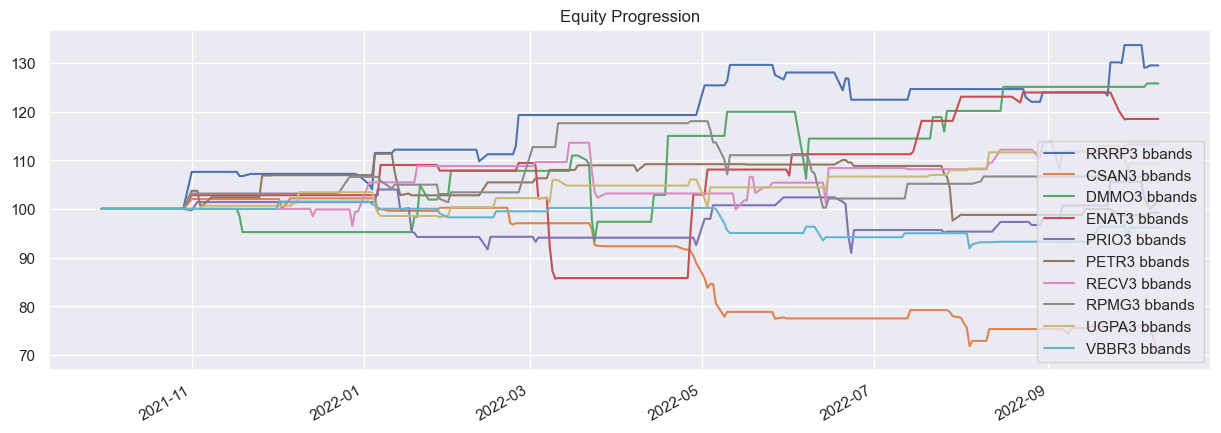

In [293]:
results.plot();

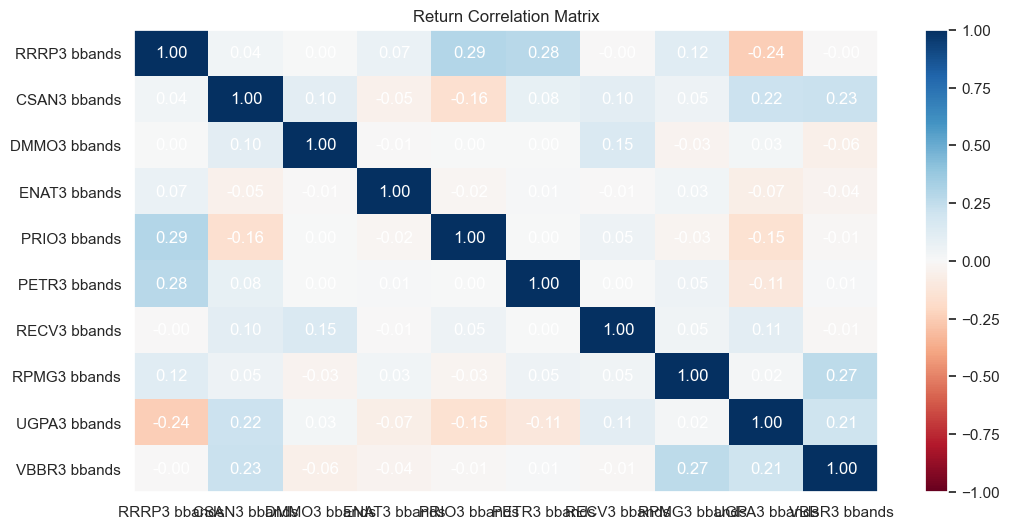

In [303]:
results.plot_correlation();

# 5.0 Análise exploratória dos dados

## 5.1 Análise Univariada

### 4.1.2 Numerical Variable

## 5.2 Análise Bivariada

### 5.2.1 Resumo das Hipóteses

## 5.3 Análise Multivariada

### 5.3.1 Atributos numéricos